<a href="https://colab.research.google.com/github/erobbins105/CoffeeShopSales/blob/main/CoffeeShopSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview: Coffee Shop Sales Analysis**

#### This project explores [transactional data from a fictional coffee shop](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training/data), including details such as date and time of purchase, product names, categories, quantities, and prices. The dataset captures trends across different locations, time periods, and product types.
Dataset Credit: [Ahmed Mohamed](https://www.kaggle.com/ahmedmohamed2003).

#### **Goal**:
The primary aim is to derive actionable business insights that can help increase revenue and improve operational efficiency. This includes identifying peak sales periods, top-performing items, customer purchasing behavior, and opportunities for upselling or inventory optimization. In addition to descriptive analysis, the project applies machine learning to forecast future sales and segment customer purchasing behavior.

#### **Key skills and tools demonstrated**:
- **Data Cleaning & Preparation**  
  - Used `pandas` to handle missing values, parse timestamps, and standardize product names and categories  
  - Engineered features such as day-of-week, hour, and holiday indicators to enrich the dataset for modeling

- **Exploratory Data Analysis (EDA)**  
  - Analyzed sales by product category, time of day, and location  
  - Identified high-revenue items and underperforming products using aggregation and `groupby` operations

- **Data Visualization**  
  - Built plots with `matplotlib` and `seaborn` to uncover trends, seasonal patterns, and peak sales periods  
  - Visualized model predictions vs. actual sales to assess performance

- **Machine Learning Applications**  
  - Built regression models (e.g., `LinearRegression`, `RandomForestRegressor`) to forecast daily or weekly sales  
  - Applied unsupervised learning (`KMeans`) to cluster customer purchase behaviors and identify key segments  
  - Evaluated models using metrics like RMSE and silhouette score

- **Insight Communication**  
  - Translated model results and EDA findings into actionable business insights  
  - Recommended strategies based on data patterns, such as product bundling or adjusted store hours

# Import libraries and datasets

In [3]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
from sklearn.tree import plot_tree


Read in the dataset csv files

In [4]:
# Mounting my Google Drive to provide access to the datasets.
from google.colab import drive
drive.mount('/content/gdrive')

# Read in files
df=pd.read_csv('gdrive/My Drive/Robbins_cafeSales.csv')

Mounted at /content/gdrive


#Visualize the data structure.

In [5]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Customer ID,IsLoyaltyMember,Time of Purchase
count,15000,15000,14398.000000,14962.000000,14363.000000,11154,10080,14759,15000,14625,14625
unique,13044,10,NaN,NaN,NaN,5,4,367,500,3,7849
top,TXN_9053365,Juice,NaN,NaN,NaN,Digital Wallet,In-store,UNKNOWN,CUST_0032,False,UNKNOWN
freq,4,1757,NaN,NaN,NaN,3420,4518,227,107,9564,375
mean,NaN,NaN,2.670163,3.090797,8.302653,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.500957,1.211173,5.995283,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,3.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.000000,4.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    15000 non-null  object 
 1   Item              15000 non-null  object 
 2   Quantity          14398 non-null  float64
 3   Price Per Unit    14962 non-null  float64
 4   Total Spent       14363 non-null  float64
 5   Payment Method    11154 non-null  object 
 6   Location          10080 non-null  object 
 7   Transaction Date  14759 non-null  object 
 8   Customer ID       15000 non-null  object 
 9   IsLoyaltyMember   14625 non-null  object 
 10  Time of Purchase  14625 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.3+ MB


In [7]:
def summarizeData():
  summary = {}

  for col in df.columns:

    if df[col].dtype == 'object':
      summary[col] = {
        'type': df[col].dtype,
        'unique_value_count': df[col].nunique()
        # 'unique_values': df[col].unique().tolist()
      }
      if df[col].nunique() < 20:
        summary[col]['unique_values'] = df[col].unique().tolist()
    else:
      summary[col] = {
        'type': df[col].dtype,
        'min': df[col].min(),
        'max': df[col].max(),
        'mean': df[col].mean()
    }

  for key in summary:
    print(f'Column: "{key}"')
    for measure in summary[key]:
      vals = summary[key][measure]
      print(f'{measure}: {vals}')
    print()

summarizeData()

Column: "Transaction ID"
type: object
unique_value_count: 13044

Column: "Item"
type: object
unique_value_count: 10
unique_values: ['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN', 'Sandwich', 'ERROR', 'Juice', 'Tea']

Column: "Quantity"
type: float64
min: 1.0
max: 5.0
mean: 2.6701625225725794

Column: "Price Per Unit"
type: float64
min: 1.0
max: 5.0
mean: 3.090796684935169

Column: "Total Spent"
type: float64
min: 1.0
max: 25.0
mean: 8.302652649168001

Column: "Payment Method"
type: object
unique_value_count: 5
unique_values: ['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan]

Column: "Location"
type: object
unique_value_count: 4
unique_values: ['Takeaway', 'In-store', 'UNKNOWN', nan, 'ERROR']

Column: "Transaction Date"
type: object
unique_value_count: 367

Column: "Customer ID"
type: object
unique_value_count: 500

Column: "IsLoyaltyMember"
type: object
unique_value_count: 3
unique_values: ['True', 'False', nan, 'ERROR']

Column: "Time of Purchase"
type: o

# Handle missing or 'error' values.

The summary of the data shows that there are multiple values to indicate  missing data: `NaN`, `'ERROR'`, and `'UNKNOWN'`. We will standardize the error values by changing the `'ERROR'`, and `'UNKNOWN'` values to be `NaN`, since these are easiest to handle in data analysis. We can then calculate the percent of missing data per column.

In [8]:
error_types = ['ERROR', 'UNKNOWN']

# Replace error values with NaN across the entire DataFrame
df = df.map(lambda val: np.nan if val in error_types else val)

# Calculate the percent of NaN values per column, if any
for col in df.columns:
  total_nan = df[col].isna().sum()
  if total_nan > 0:
    column_length = len(df[col])
    print(f'Percent of data missing in "{col}": {round((total_nan/column_length)*100,3)}%\n')
  else:
    print(f'No missing data in "{col}"\n')

No missing data in "Transaction ID"

Percent of data missing in "Item": 9.207%

Percent of data missing in "Quantity": 4.013%

Percent of data missing in "Price Per Unit": 0.253%

Percent of data missing in "Total Spent": 4.247%

Percent of data missing in "Payment Method": 32.24%

Percent of data missing in "Location": 40.113%

Percent of data missing in "Transaction Date": 4.62%

No missing data in "Customer ID"

Percent of data missing in "IsLoyaltyMember": 5.0%

Percent of data missing in "Time of Purchase": 5.0%



We know that each item should have one constant price. First we can ensure that, for all valid values in the `Item` column, any `NaN` values in the `Price Per Unit` column can be replaced with the correct value for that item.

In [9]:
# Perform groupby to extract unique price per item
price_per_item = df.groupby('Item')['Price Per Unit'].unique().reset_index()
price_per_item['Price Per Unit'] = price_per_item['Price Per Unit'].apply(lambda x: x[0] if len(x) == 1 else x.tolist())
price_per_item_dict = dict(zip(price_per_item['Item'], price_per_item['Price Per Unit']))

def fix_price(row):
    item = row['Item']
    price = row['Price Per Unit']

    if pd.isna(price) or price in error_types or item in error_types or pd.isna(item):
        return price_per_item_dict.get(item, np.nan)  # fallback to dictionary if possible
    else:
        return price

df['Price Per Unit'] = df.apply(fix_price, axis=1)

We have 3 columns, `Quantity`, `Price Per Unit`, and `Total Spent`. Some values in these columns are empty or errors, but since Total Spent = Quantity x Price Per Unit, we can calculate missing values if 2 of the 3 values are provided.

In [10]:
# Fix Total Spent where Quantity and Price Per Unit are present
mask_fix_total = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask_fix_total, 'Total Spent'] = df.loc[mask_fix_total, 'Quantity'] * df.loc[mask_fix_total, 'Price Per Unit']

# Fix Price Per Unit where Quantity and Total Spent are present
mask_fix_price = df['Price Per Unit'].isna() & df['Quantity'].notna() & df['Total Spent'].notna()
df.loc[mask_fix_price, 'Price Per Unit'] = df.loc[mask_fix_price, 'Total Spent'] / df.loc[mask_fix_price, 'Quantity']

# Fix Quantity where Price Per Unit and Total Spent are present
mask_fix_quantity = df['Quantity'].isna() & df['Price Per Unit'].notna() & df['Total Spent'].notna()
df.loc[mask_fix_quantity, 'Quantity'] = df.loc[mask_fix_quantity, 'Total Spent'] / df.loc[mask_fix_quantity, 'Price Per Unit']

Correct column types where necessary.

In [11]:
df['Transaction Date']= pd.to_datetime(df['Transaction Date'])
# df['Time of Purchase'] = pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S', errors='coerce').dt.time
df['Day of Year'] = df['Transaction Date'].dt.dayofyear
df['Day of Week'] = df['Transaction Date'].dt.dayofweek
df['IsLoyaltyMember'] = df['IsLoyaltyMember'].map({'True': True, 'False': False}).astype('boolean')

In [12]:
# Define day-of-year ranges for seasons (based on https://www.timeanddate.com/calendar/seasons.html)
march_equinox = datetime.datetime(2023, 3, 20).timetuple().tm_yday
june_solstice = datetime.datetime(2023, 6, 21).timetuple().tm_yday
september_equinox = datetime.datetime(2023, 9, 23).timetuple().tm_yday
december_solstice = datetime.datetime(2023, 12, 21).timetuple().tm_yday

conditions = [
    (df['Day of Year'] >= march_equinox) & (df['Day of Year'] < june_solstice), #Spring
    (df['Day of Year'] >= june_solstice) & (df['Day of Year'] < september_equinox), #Summer
    (df['Day of Year'] >= september_equinox) & (df['Day of Year'] < december_solstice), #Fall
    (df['Day of Year'] >= december_solstice) | (df['Day of Year'] < march_equinox) #Winter
]

choices = ['Spring', 'Summer', 'Fall', 'Winter']

# Create 'Season' column
df['Season'] = np.select(conditions, choices, default=None)
df['Season'] = df['Season'].replace({None: np.nan})

# summarizeData()

In [13]:
# Sample dictionary (customize this)
df['Time of Purchase'] = pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S', errors='coerce').dt.time
df['Minute of Day'] = df['Time of Purchase'].apply(lambda t: t.hour * 60 + t.minute if pd.notnull(t) else np.nan)

times_of_day_ranges = [
    (df['Minute of Day'] >= 300) & (df['Minute of Day'] < 540), #5:00am - 8:59am
    (df['Minute of Day'] >= 540) & (df['Minute of Day'] < 780), #9:00am - 12:59pm
    (df['Minute of Day'] >= 780) & (df['Minute of Day'] < 1020), #1:00pm - 4:59pm
]

times_of_day_labels = ['Morning','Midday','Afternoon']

# Create 'Time of Day of Purchase' column
df['Time of Day of Purchase'] = np.select(times_of_day_ranges, times_of_day_labels, default=None)
df['Time of Day of Purchase'] = df['Time of Day of Purchase'].replace({None: np.nan})


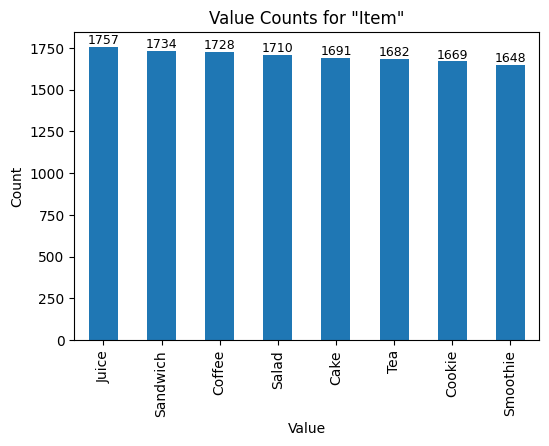

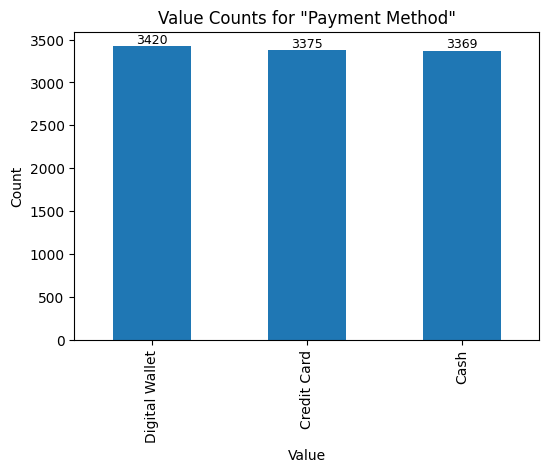

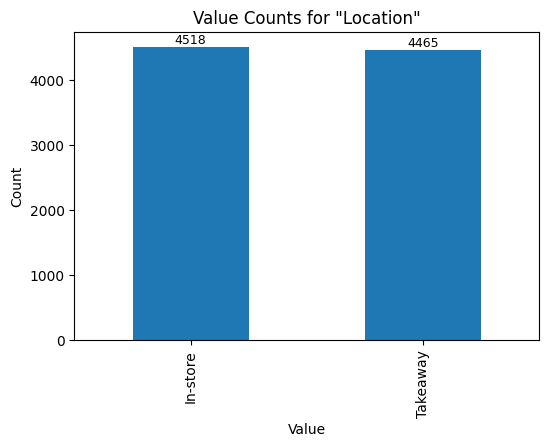

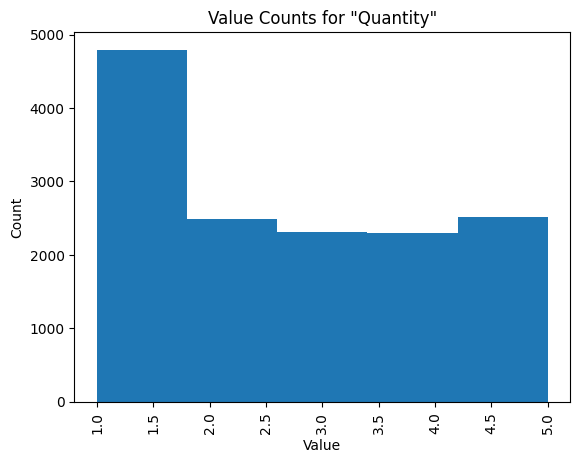

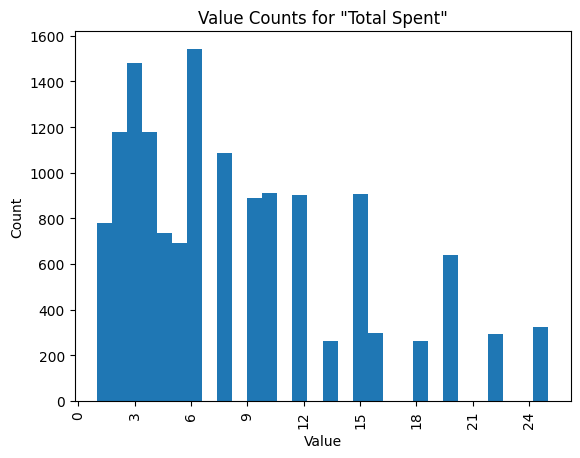

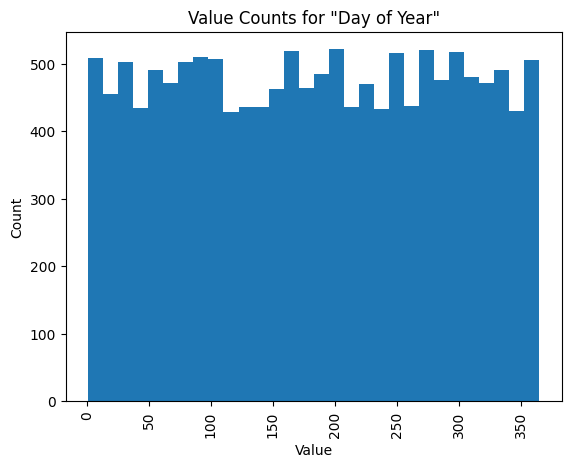

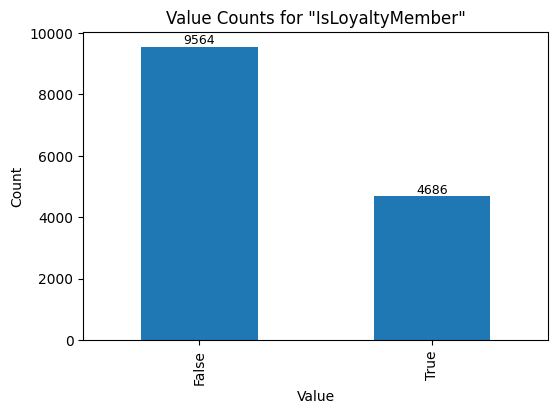

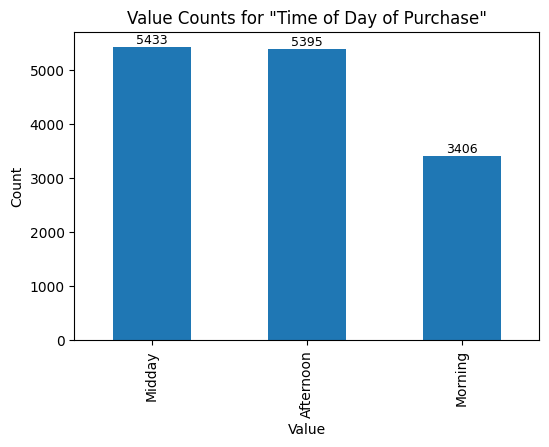

In [14]:
cols_to_plot = ['Item', 'Payment Method', 'Location','Quantity','Total Spent', 'Day of Year', 'IsLoyaltyMember','Time of Day of Purchase']

for col in cols_to_plot:
  if df[col].dtype == 'float64':
    if df[col].nunique() < 10:
      bins = df[col].nunique()
    else:
      bins = 30
    df[col].dropna().hist(bins=bins, grid=False)
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
    plt.xticks(rotation=90)
    plt.title(f'Value Counts for "{col}"')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()
  else:
    plt.figure(figsize=(6, 4))
    value_counts = df[col].value_counts()
    ax = value_counts.plot(kind='bar')
    # Add count labels above each bar
    for i, count in enumerate(value_counts):
      ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=9)
    plt.title(f'Value Counts for "{col}"')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

# Feature Engineering

In [15]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Customer ID,IsLoyaltyMember,Time of Purchase,Day of Year,Day of Week,Season,Minute of Day,Time of Day of Purchase
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,CUST_0127,True,13:50:19,251.0,4.0,Summer,830.0,Afternoon
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,CUST_0294,False,10:23:43,136.0,1.0,Spring,623.0,Midday
2,TXN_4271903,Cookie,4.0,1.5,6.0,Credit Card,In-store,2023-07-19,CUST_0400,True,NaT,200.0,2.0,Summer,NaN,NaN
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,CUST_0070,False,14:22:00,117.0,3.0,Spring,862.0,Afternoon
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,CUST_0061,False,14:05:43,162.0,6.0,Spring,845.0,Afternoon


# ML

In [16]:
# Basic feature set (customize as needed)
# Step 1: Keep only rows where IsLoyaltyMember is True or False
df = df[df['IsLoyaltyMember'].isin([True, False])].copy()

# Step 2: Define features and target
features = ['Quantity', 'Price Per Unit', 'Total Spent', 'Minute of Day', 'Day of Year']
X = df[features]
y = df['IsLoyaltyMember'].map({True: 1, False: 0})

# features = ['Quantity', 'Price Per Unit', 'Total Spent', 'Minute of Day', 'Day of Year']
# X = df[features]
# df = df[df['IsLoyaltyMember'].isin([True, False])]
# y = df['IsLoyaltyMember'].map({True: 1, False: 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1931
           1       0.57      0.39      0.46       919

    accuracy                           0.71      2850
   macro avg       0.66      0.63      0.63      2850
weighted avg       0.69      0.71      0.69      2850



In [17]:
# Basic feature set (customize as needed)
# Step 1: Keep only rows where IsLoyaltyMember is True or False
df = df[df['IsLoyaltyMember'].isin([True, False])].copy()

# Step 2: Define features and target
features = ['Quantity', 'Price Per Unit', 'Total Spent', 'Minute of Day', 'Day of Year']
X = df[features]
y = df['IsLoyaltyMember'].map({True: 1, False: 0})

# features = ['Quantity', 'Price Per Unit', 'Total Spent', 'Minute of Day', 'Day of Year']
# X = df[features]
# df = df[df['IsLoyaltyMember'].isin([True, False])]
# y = df['IsLoyaltyMember'].map({True: 1, False: 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X_train,
    response_method="predict",
    xlabel="Total Spent",
    ylabel="Minute of Day",
    alpha=0.5
)
scatter = disp.ax_.scatter(
    X_train['Total Spent'], X_train['Minute of Day'],
    c=y_train, edgecolor='k', cmap=plt.cm.coolwarm
)
disp.ax_.legend(*scatter.legend_elements(), title="Loyalty")
disp.ax_.set_title("Random Forest Decision Boundary (Total Spent vs Minute of Day)")
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1931
           1       0.57      0.39      0.46       919

    accuracy                           0.71      2850
   macro avg       0.66      0.63      0.63      2850
weighted avg       0.69      0.71      0.69      2850



ValueError: n_features must be equal to 2. Got 5 instead.

In [ ]:
# Visualize one decision tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          feature_names=features,
          class_names=['Not Loyalty', 'Loyalty'],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title("Sample Decision Tree from Random Forest")
plt.show()

In [ ]:
# Get feature importances
importances = pd.Series(model.feature_importances_, index=features)
importances = importances.sort_values()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()